In [1]:
from src.iterpretability.utils import attribution_accuracy
import seaborn as sns
import pandas as pd 

import numpy as np

from src.iterpretability.explain import Explainer
from src.iterpretability.synthetic_experiment import PredictiveSensitivity

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from src.iterpretability.utils import (
    dataframe_line_plot,
)

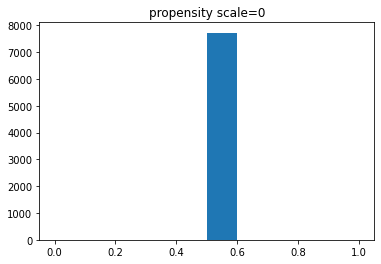

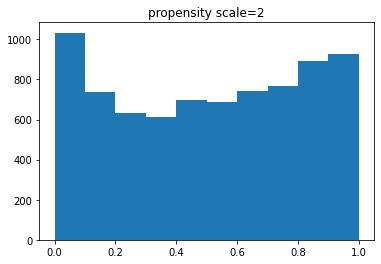

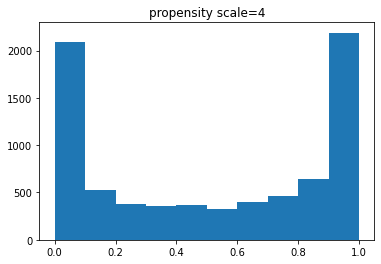

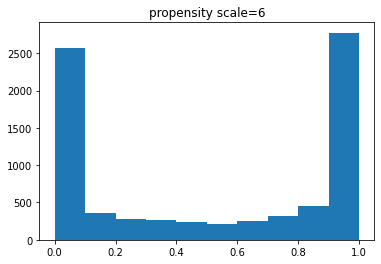

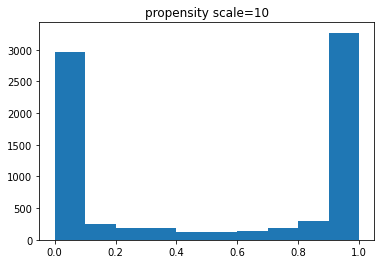

In [14]:
from src.iterpretability.datasets.data_loader import load
from src.iterpretability.synthetic_simulate import SyntheticSimulatorLinear
import matplotlib.pyplot as plt
    
X_raw_train, X_raw_test = load('tcga_100', train_ratio=0.8)
sim = SyntheticSimulatorLinear(X_raw_train, num_important_features=20,
                                           random_feature_selection=True, seed=42)
propensity_type= 'prog'
for propensity_scale in [0, 2, 4, 6, 10]:
    X_train, W_train, Y_train, po0_train, po1_train, propensity_train = sim.simulate_dataset(X_raw_train,
                                                                                                     predictive_scale=0.1,
                                                                                                     binary_outcome=False,
                                                                                                     treatment_assign=propensity_type,
                                                                                                     prop_scale=propensity_scale)
    plt.hist(propensity_train)
    plt.title('propensity scale={}'.format(propensity_scale))
    plt.show()

In [12]:
X_raw_test.shape

(1932, 100)

In [2]:
result_names_to_average = ['Pred features ACC', 'Prog features ACC', 'PEHE', 'Factual RMSE']

In [26]:
def aggregate_results_and_plot(dataset, num_important_features, propensity_type, binary_outcome, predictive_scale, seeds_list, exp_type='propensity', nonlinscale=0, train_ratio=0.1, subset_exp=None, plotse=True):
    results_df_list = []
    if exp_type == 'propensity':
        axis_name = 'Propensity Scale'
        results_path = 'results/propensity_sensitivity/'
        logscale=False
        for seed in seeds_list:
            if train_ratio == 0.8:
                results_filename = f"propensity_scale_{dataset}_{num_important_features}_proptype_{propensity_type}_predscl_{predictive_scale}_nonlinscl_{nonlinscale}binary_{binary_outcome}-seed{seed}.csv"
            else:
                results_filename = f"propensity_scale_{dataset}_{num_important_features}_proptype_{propensity_type}_predscl_{predictive_scale}_nonlinscl_{nonlinscale}_trainratio_{train_ratio}_binary_{binary_outcome}-seed{seed}.csv"
            results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
        results_df = pd.concat(results_df_list)
    elif exp_type == 'predictive':
        axis_name = 'Predictive Scale'
        results_path = 'results/predictive_sensitivity/'
        logscale=True
        for seed in seeds_list:
            results_filename = f"snetfro_predictive_scale_{dataset}_{num_important_features}_linear_random_True_binary_{binary_outcome}-seed{seed}.csv"
            results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
        results_df = pd.concat(results_df_list)
    else:
        raise ValueError('Invalid experiment type')
    
    if subset_exp is not None:
        results_df= results_df.loc[results_df['Explainer']==subset_exp, :]
    
    metrics = [ 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Factual RMSE']
    #metrics = ['Prog features ACC']
    
    for metric in metrics:
        fig = dataframe_line_plot(
            results_df,
            axis_name,
            metric,
            np.unique(results_df['Explainer']),
            np.unique(results_df['Learner']),
            aggregate=True,
            x_logscale=logscale,
            plotse=plotse
            )
    

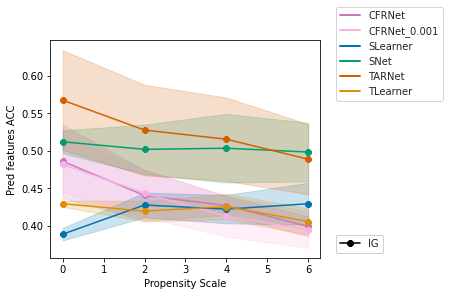

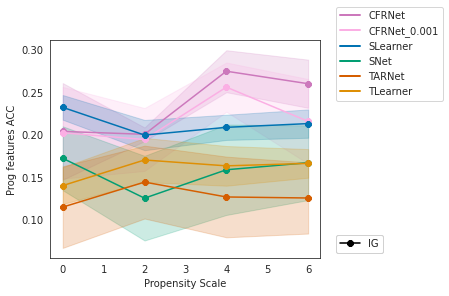

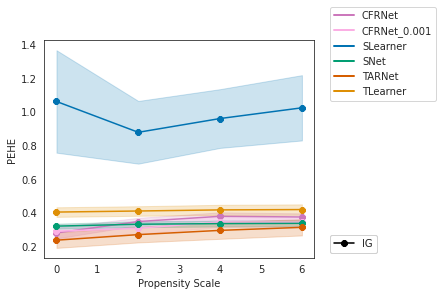

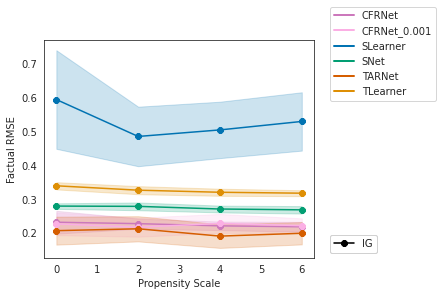

In [18]:
seeds_list = [42, 666, 25, 77, 55]
aggregate_results_and_plot('tcga_100', 20, 'pred', 'False', 1, seeds_list, 'propensity')

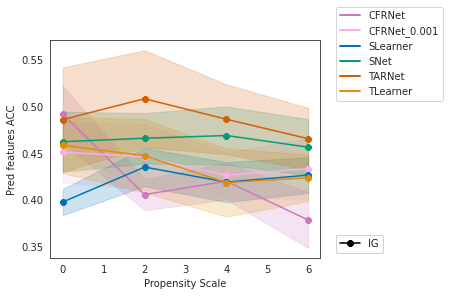

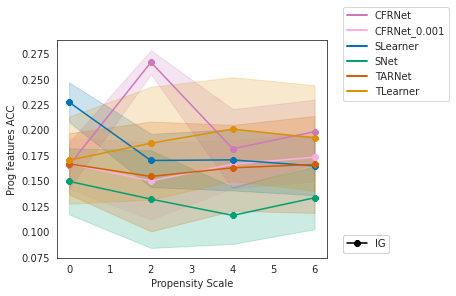

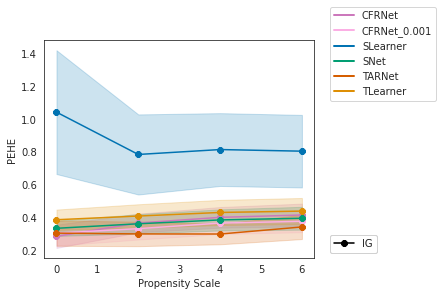

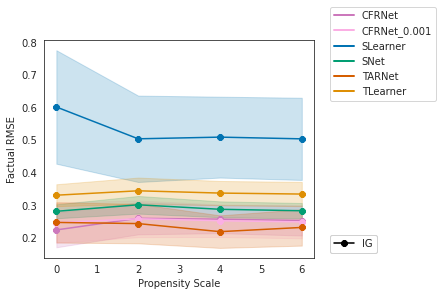

In [19]:
seeds_list = [42, 666, 25, 77, 55]
aggregate_results_and_plot('tcga_100', 20, 'pred', 'False', 1, seeds_list, 'propensity', nonlinscale=1)

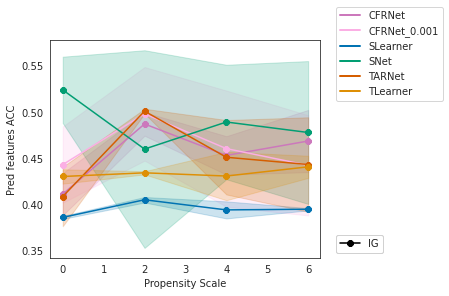

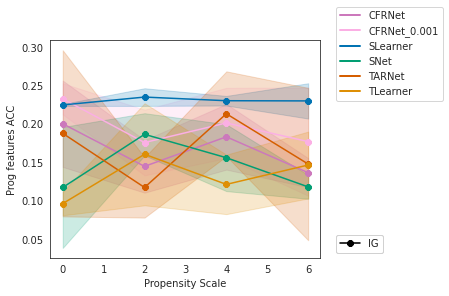

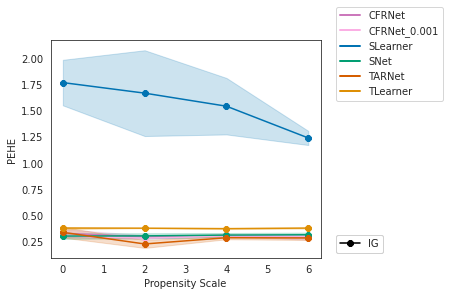

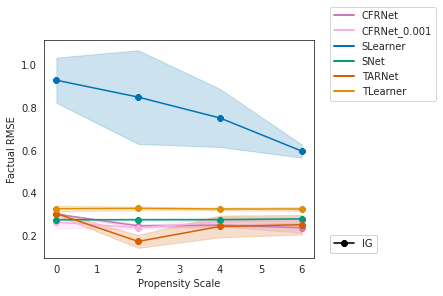

In [22]:
seeds_list = [42, 666]
aggregate_results_and_plot('tcga_100', 20, 'irrelevant_var', 'False', 1, seeds_list, 'propensity', nonlinscale=0)

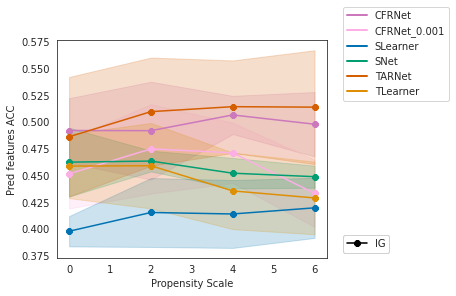

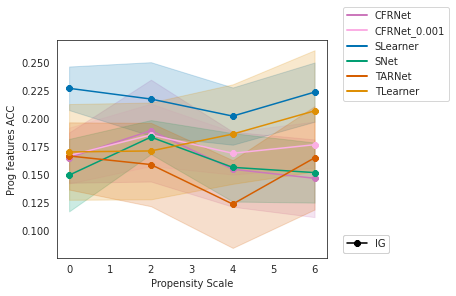

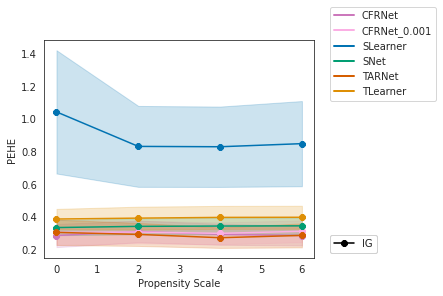

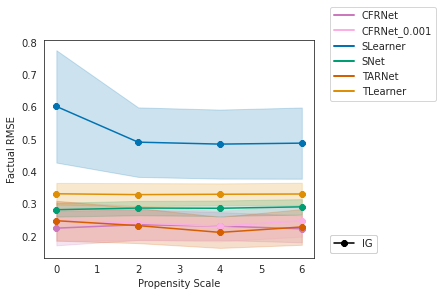

In [20]:
seeds_list = [42, 666, 25, 77, 55]
aggregate_results_and_plot('tcga_100', 20, 'irrelevant_var', 'False', 1, seeds_list, 'propensity', nonlinscale=1)

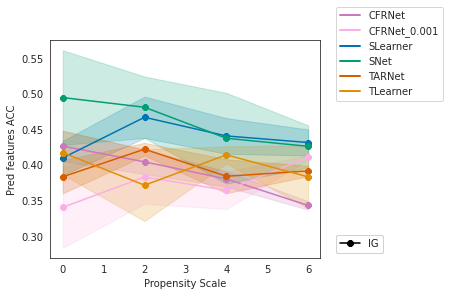

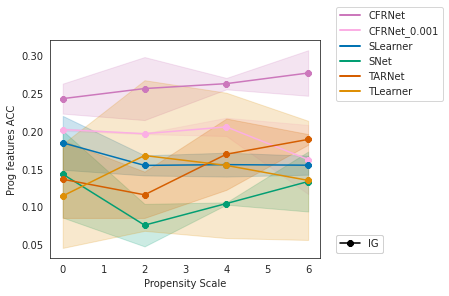

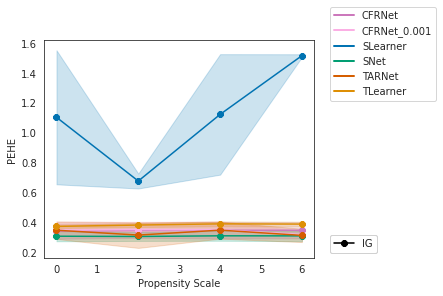

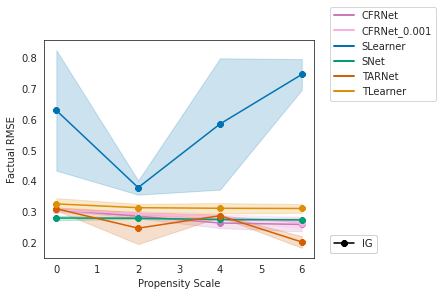

In [25]:
seeds_list = [42, 666]
aggregate_results_and_plot('tcga_100', 20, 'pred', 'False', 1, seeds_list, 'propensity', nonlinscale=0, train_ratio=0.2)

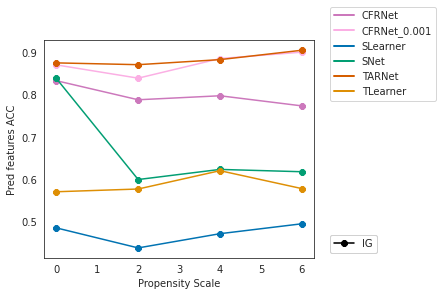

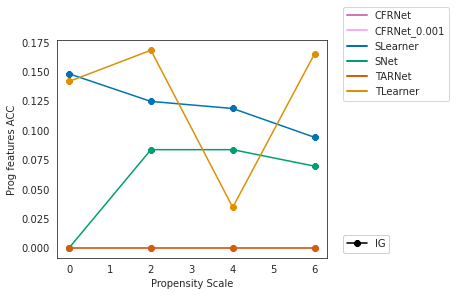

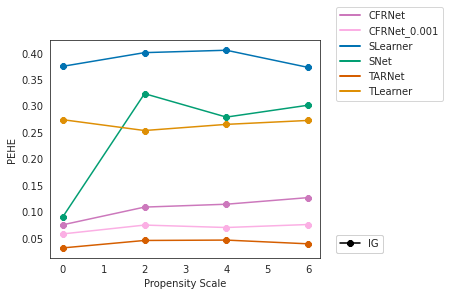

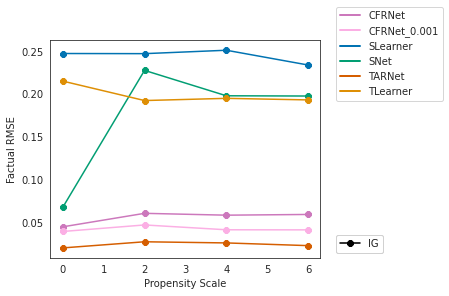

In [27]:
seeds_list = [42]
aggregate_results_and_plot('tcga_100', 20, 'top_pred', 'False', 1, seeds_list, 'propensity', nonlinscale=0, train_ratio=0.8, plotse=False)

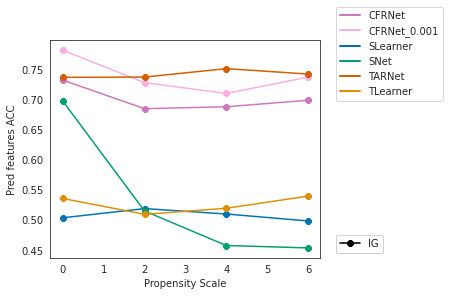

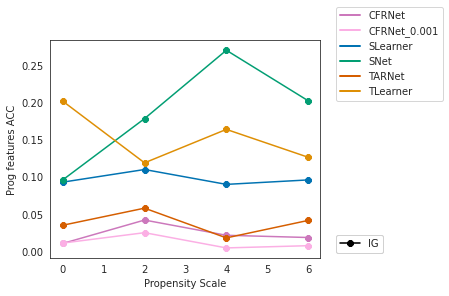

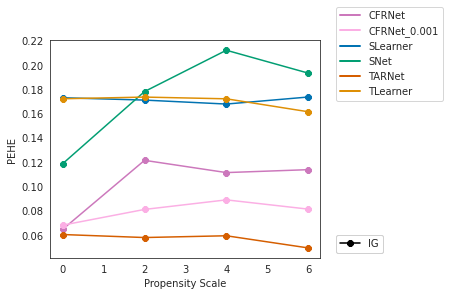

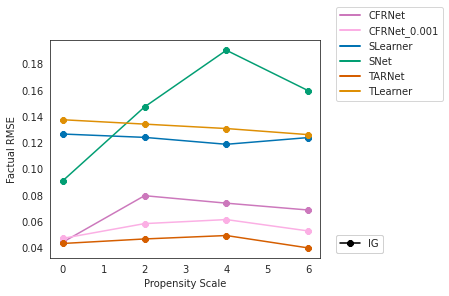

In [28]:
seeds_list = [42]
aggregate_results_and_plot('tcga_100', 20, 'top_pred', 'False', 1, seeds_list, 'propensity', nonlinscale=1, train_ratio=0.8, plotse=False)

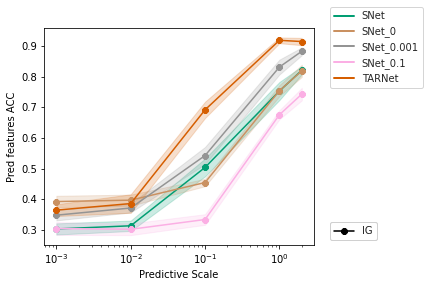

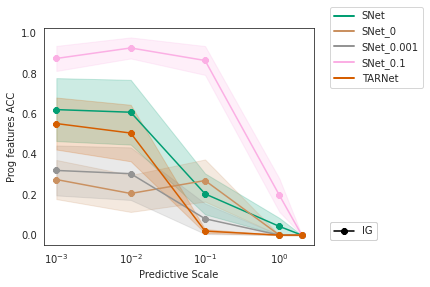

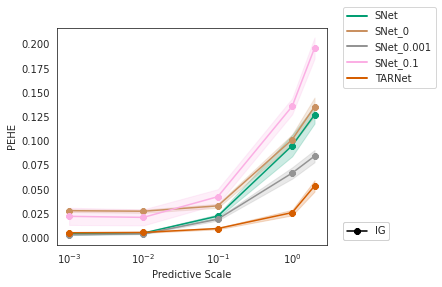

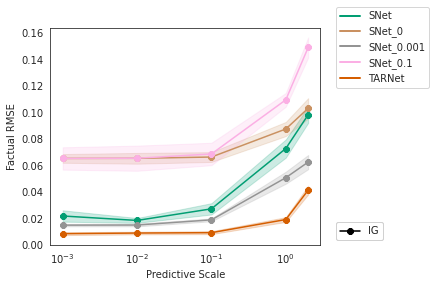

In [5]:
seeds_list = [42, 666, 25, 77, 55, 88, 99, 10, 2, 50]
# ortho snet
aggregate_results_and_plot('tcga_100', 20, 'irrelevant_var', 'False', 1, seeds_list, exp_type='predictive')

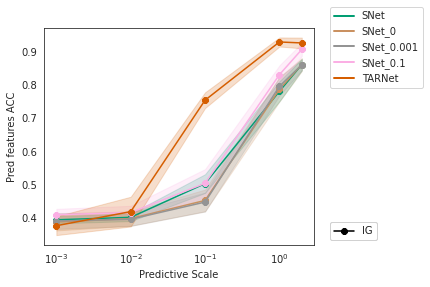

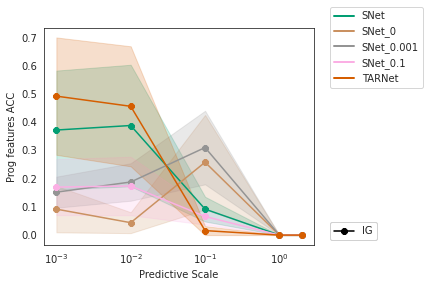

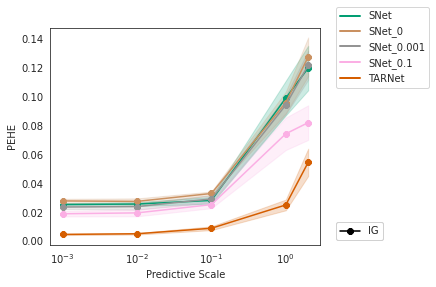

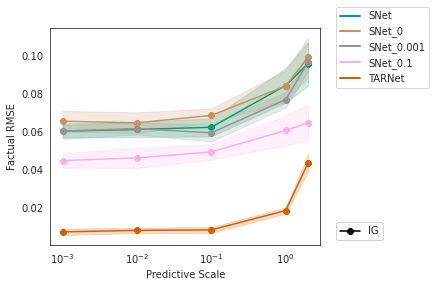

In [25]:
# fro snet
seeds_list = [42, 666, 25, 77, 55]
aggregate_results_and_plot('tcga_100', 20, 'irrelevant_var', 'False', 1, seeds_list, exp_type='predictive')

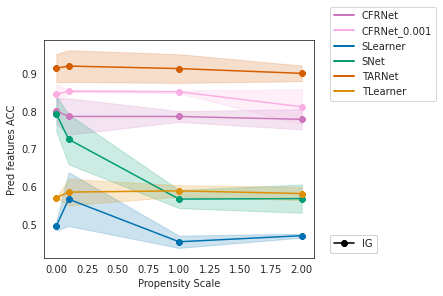

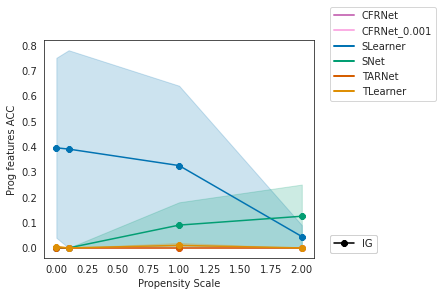

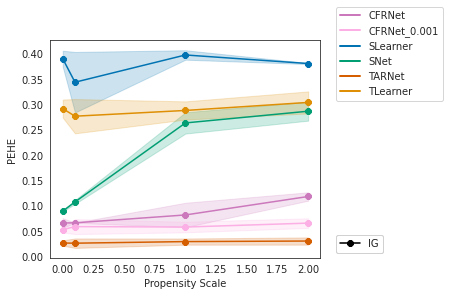

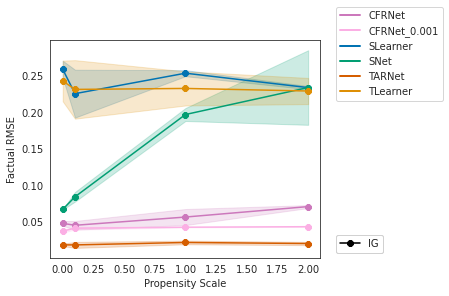

In [20]:
seeds_list =seeds_list = [42, 666] # 25, 77, 55]
aggregate_results_and_plot('tcga_100', 20, 'irrelevant_var', 'False', 1, seeds_list, 'propensity','integrated_gradients')

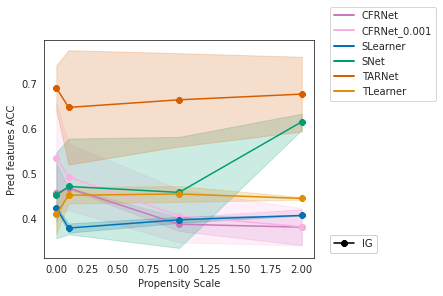

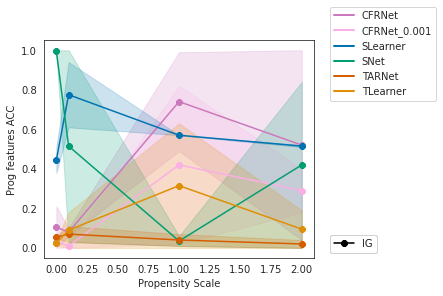

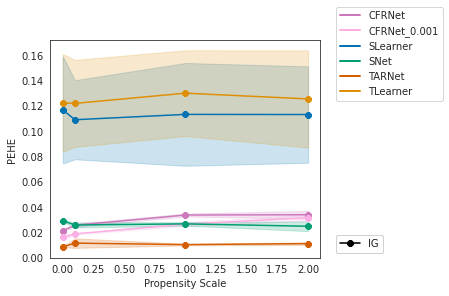

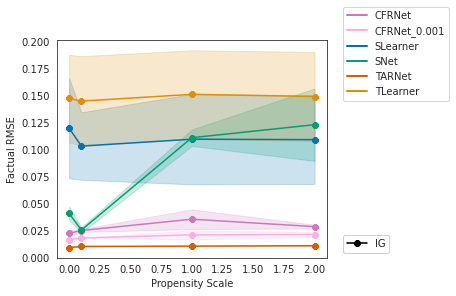

In [21]:
aggregate_results_and_plot('tcga_100', 20, 'pred', 'False', 0.1, seeds_list, 'propensity', 'integrated_gradients')

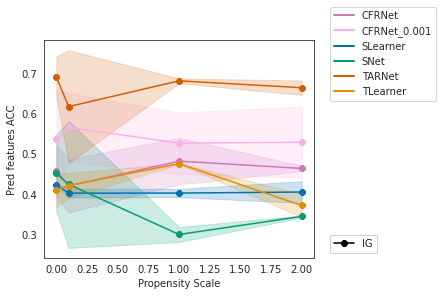

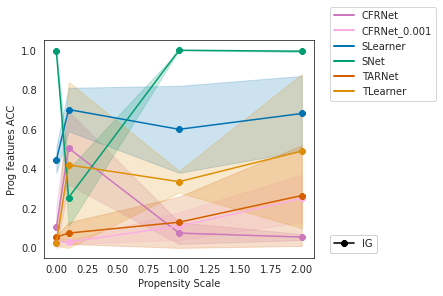

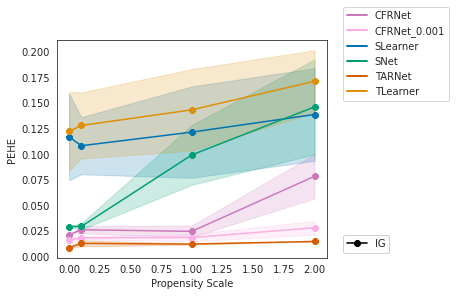

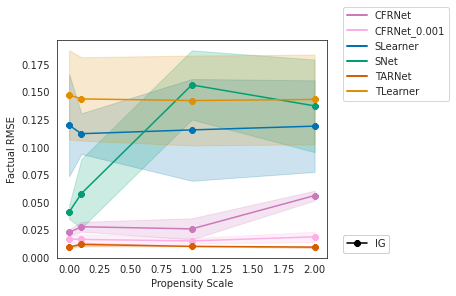

In [22]:
aggregate_results_and_plot('tcga_100', 20, 'prog', 'False', 0.1, seeds_list, 'propensity', 'integrated_gradients')

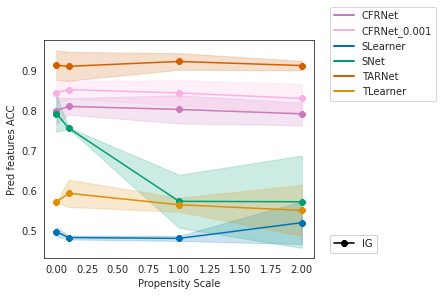

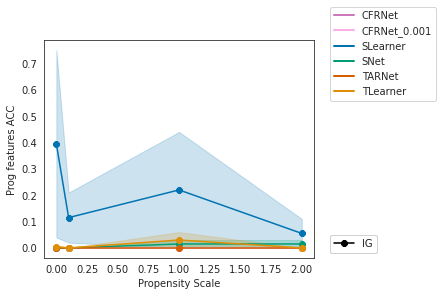

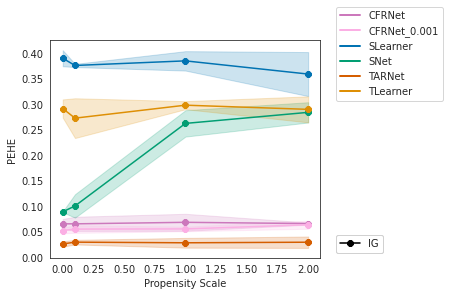

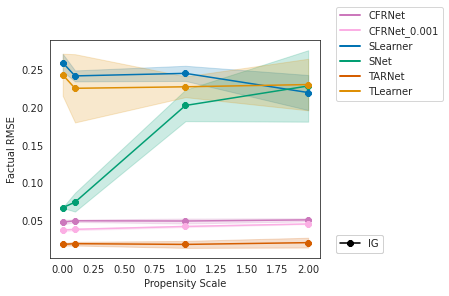

In [11]:
aggregate_results_and_plot('tcga_100', 20, 'top_prog', 'False', 1, seeds_list, 'propensity', 'integrated_gradients')

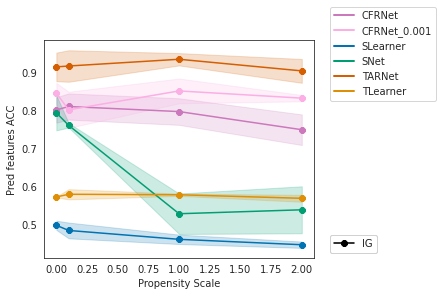

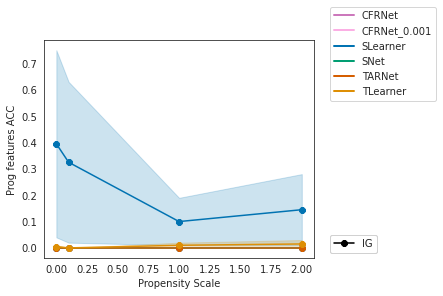

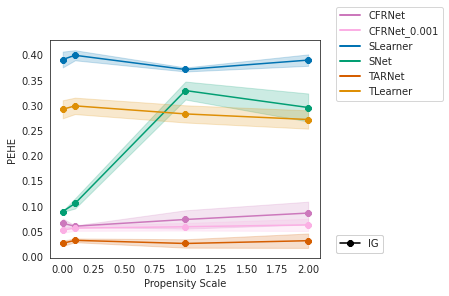

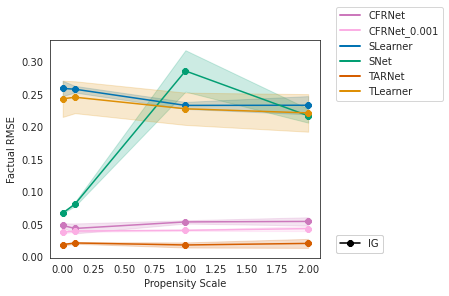

In [13]:
aggregate_results_and_plot('tcga_100', 20, 'top_pred', 'False', 1, seeds_list, 'propensity', 'integrated_gradients')

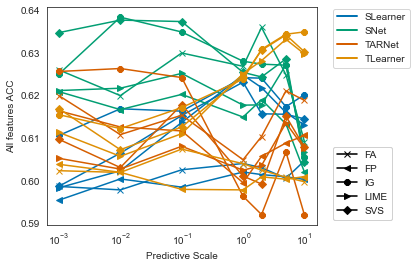

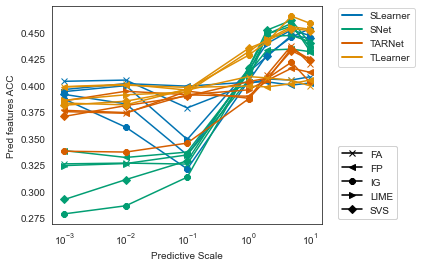

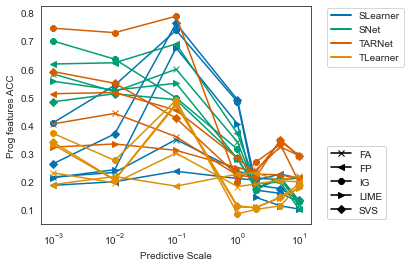

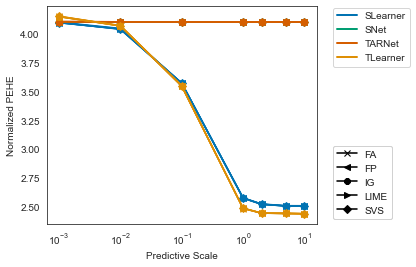

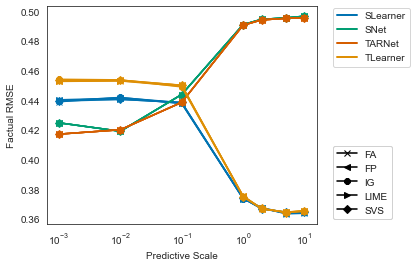

In [23]:
aggregate_results_and_plot('tcga_100', 20, 'linear', 'True', seeds_list)

# Linear + least correlated 

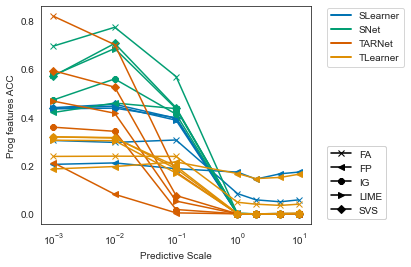

In [26]:
aggregate_results_and_plot('tcga_20', 4, 'linear', 'False', seeds_list)

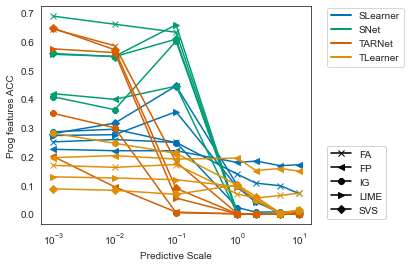

In [27]:
aggregate_results_and_plot('tcga_20', 4, 'linear_least_correlated', 'False', seeds_list)

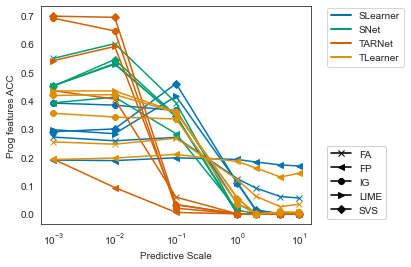

In [28]:
aggregate_results_and_plot('tcga_20', 4, 'linear_most_correlated', 'False', seeds_list)

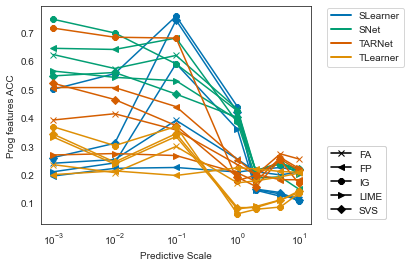

In [32]:
aggregate_results_and_plot('tcga_100', 20, 'linear', 'True', seeds_list)

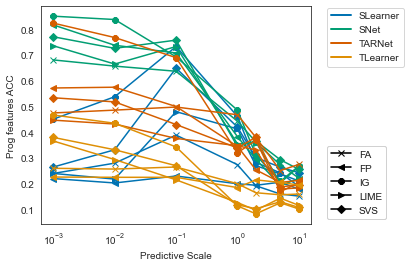

In [33]:
aggregate_results_and_plot('tcga_100', 20, 'linear_least_correlated', 'True', seeds_list)

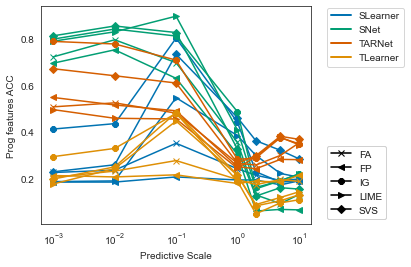

In [34]:
aggregate_results_and_plot('tcga_100', 20, 'linear_most_correlated', 'True', seeds_list)